<a href="https://colab.research.google.com/github/AbhishekRP2002/ML-AI-Notes-and-Self-Parctice/blob/main/PhishingDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Phishing Detection Using Machine Learning 

---
## Task :
The candidates have to read the data and create a model baased on the data analysis to identify if the website is legitimate or a phishing . The Result will be detrmined by the two values [-1,1], where 1 represent Legitimate website and -1 represnets phishing.


**Submission:**
- Output file generated by the model
- Source code file or .ipynb file or Report
- Report or presentation with model explanation

# Loading Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('/content/Phising_Training_Dataset.csv')
df.head(100)

,key,having_IP,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,12344,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,12345,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,12346,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,12347,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,12348,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,12439,1,-1,1,1,1,-1,-1,-1,1,...,1,1,-1,1,-1,-1,1,1,1,-1
96,12440,1,-1,1,1,1,-1,1,1,-1,...,1,1,1,-1,0,-1,1,-1,1,-1
97,12441,1,1,1,1,1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,-1,1,-1
98,12442,-1,-1,-1,1,-1,-1,-1,-1,-1,...,-1,1,-1,-1,0,-1,1,0,-1,-1


# Familiarizing  with the Data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8955 entries, 0 to 8954
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   key                          8955 non-null   int64
 1   having_IP                    8955 non-null   int64
 2   URL_Length                   8955 non-null   int64
 3   Shortining_Service           8955 non-null   int64
 4   having_At_Symbol             8955 non-null   int64
 5   double_slash_redirecting     8955 non-null   int64
 6   Prefix_Suffix                8955 non-null   int64
 7   having_Sub_Domain            8955 non-null   int64
 8   SSLfinal_State               8955 non-null   int64
 9   Domain_registeration_length  8955 non-null   int64
 10  Favicon                      8955 non-null   int64
 11  port                         8955 non-null   int64
 12  HTTPS_token                  8955 non-null   int64
 13  Request_URL                  8955 non-null   int

In [7]:
df.describe()

,key,having_IP,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.00000,...,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000
mean,16821.000000,0.307203,-0.635734,0.740480,0.709436,0.740704,-0.735343,0.071803,0.264545,-0.33646,...,0.606700,0.829816,0.028922,0.371078,0.291792,-0.479397,0.712339,0.338582,0.728867,0.124288
std,2585.230164,0.951697,0.763660,0.672116,0.704809,0.671870,0.677733,0.817419,0.908003,0.94175,...,0.794975,0.558069,0.999637,0.928654,0.825557,0.877647,0.701874,0.576068,0.684694,0.992302
min,12344.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,14582.500000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.00000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,16821.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,19059.500000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,21298.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
#Listing the features of the dataset
df.columns

Index(['key', 'having_IP', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

In [10]:
df.shape

(8955, 32)

# Visualization of the data

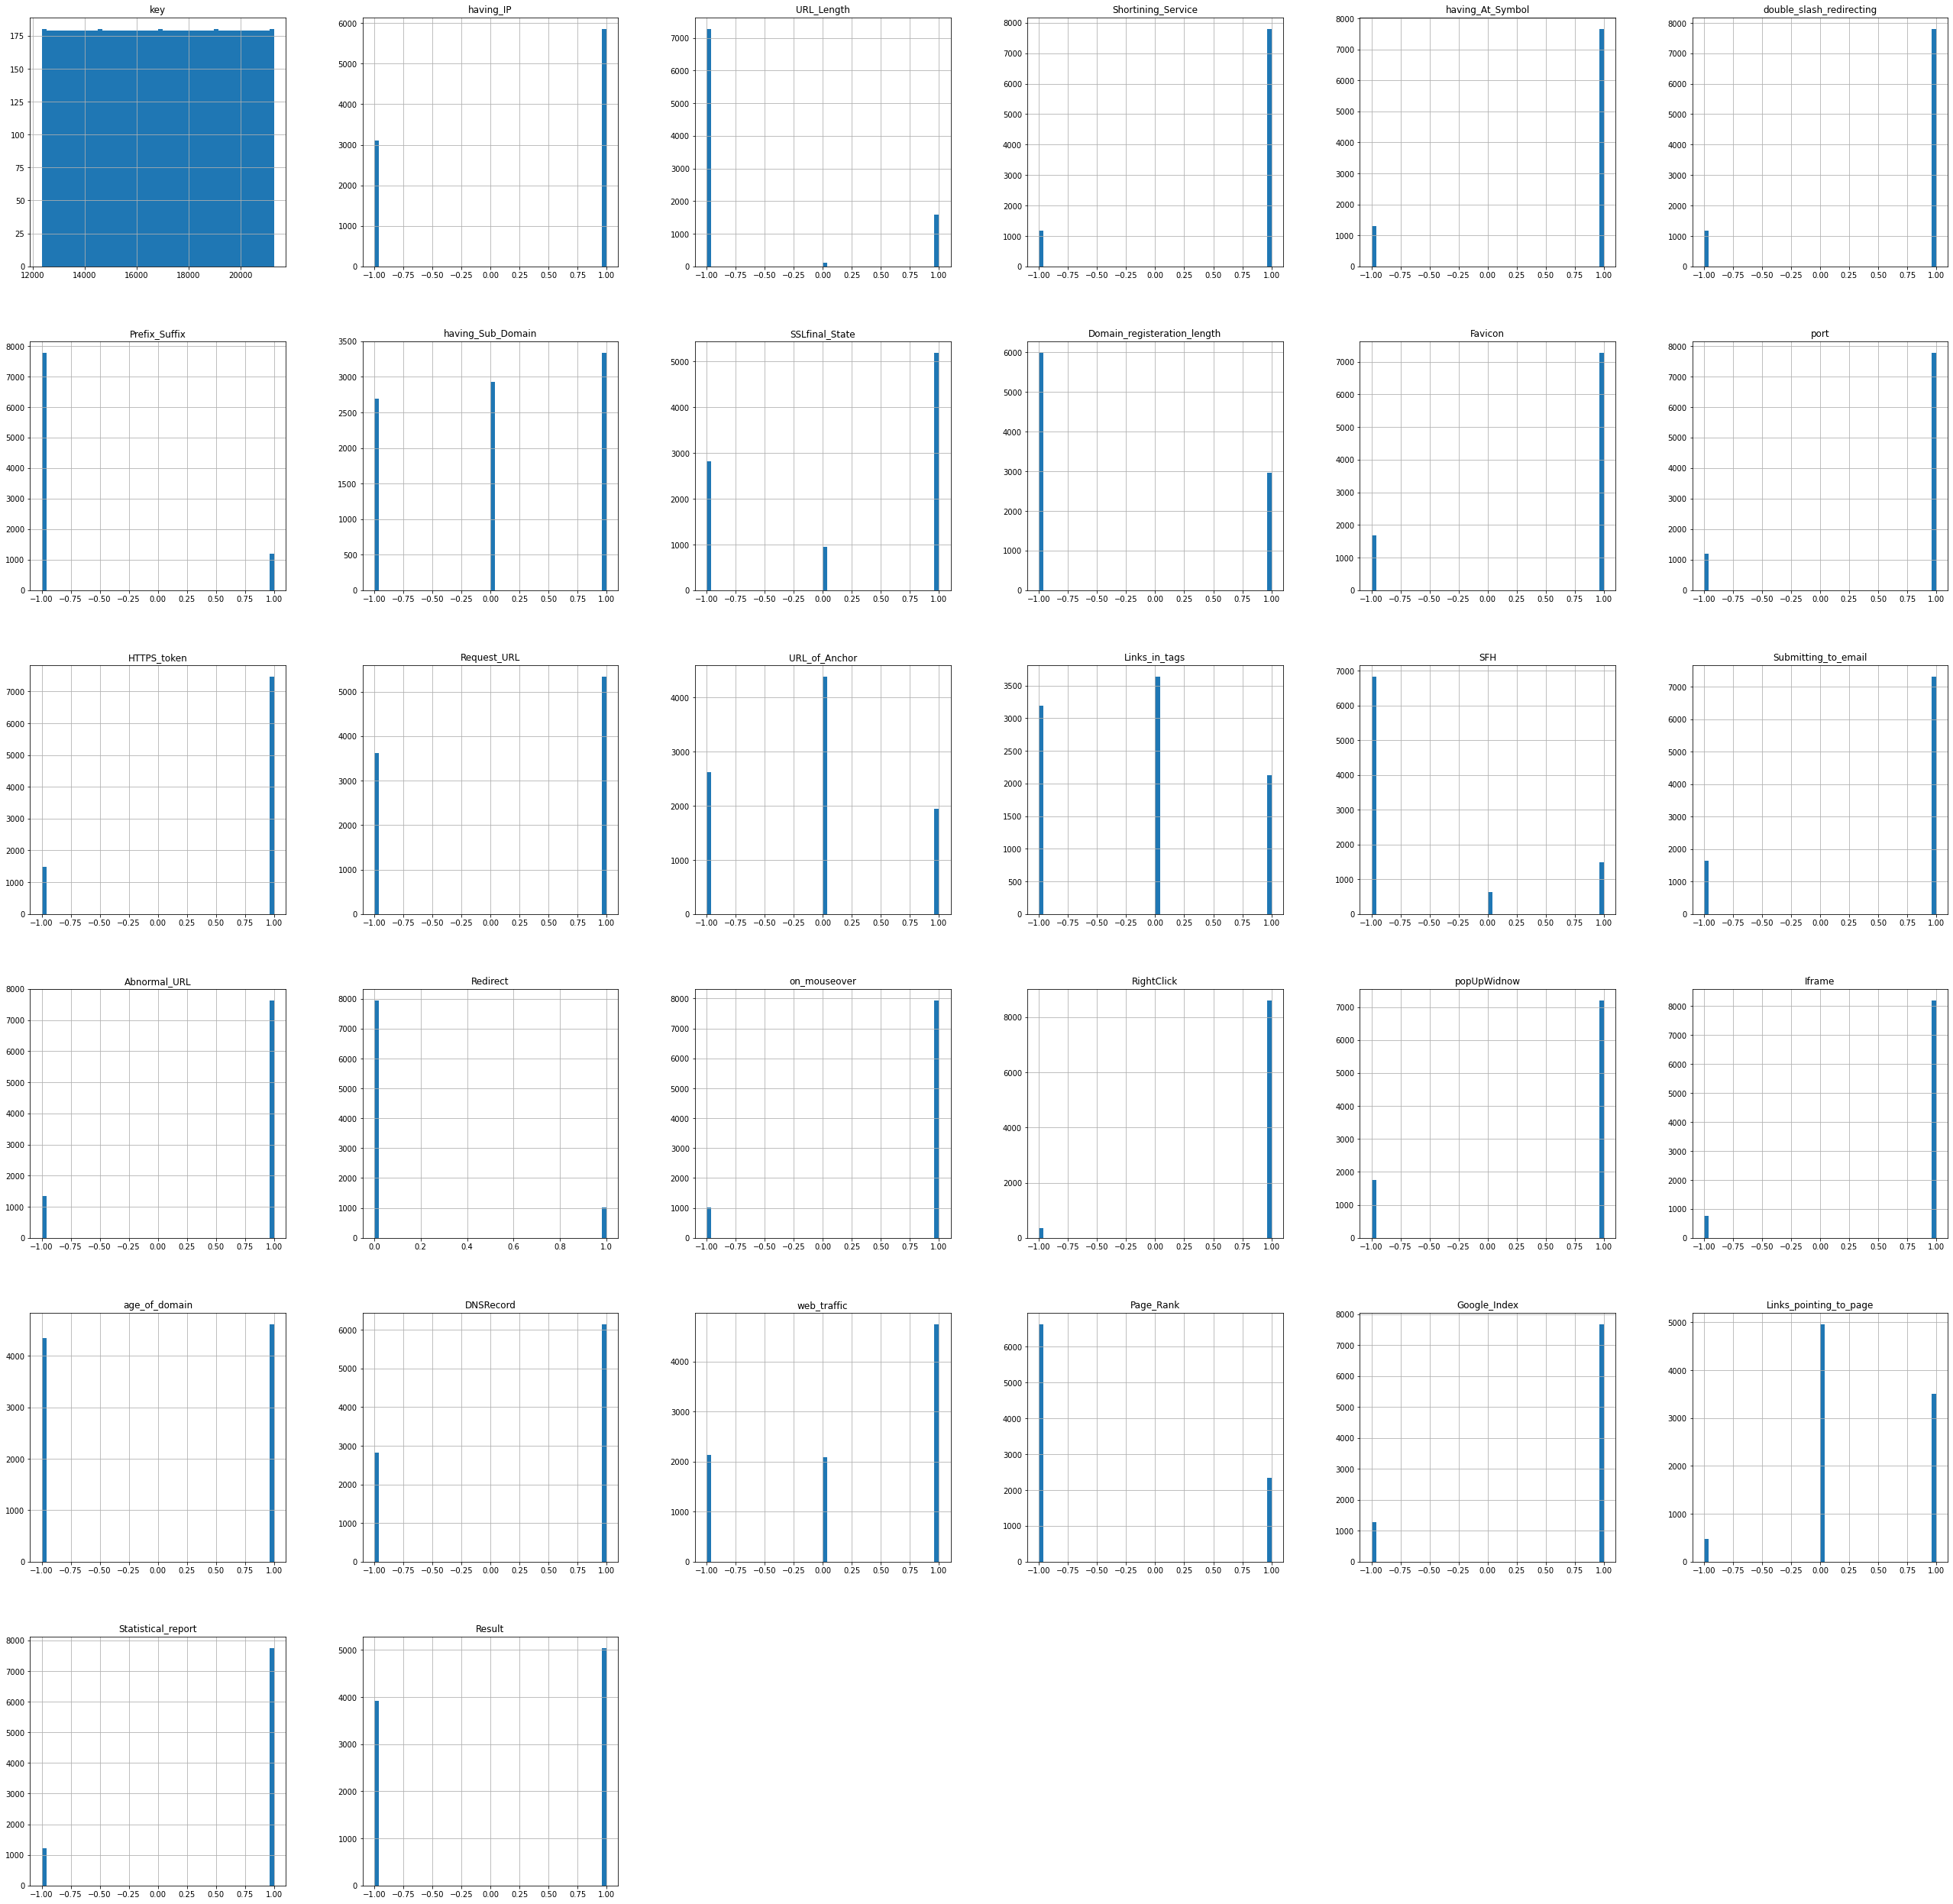

In [16]:
#Plotting the data distribution
df.hist(bins = 50,figsize = (45,45))
plt.show()

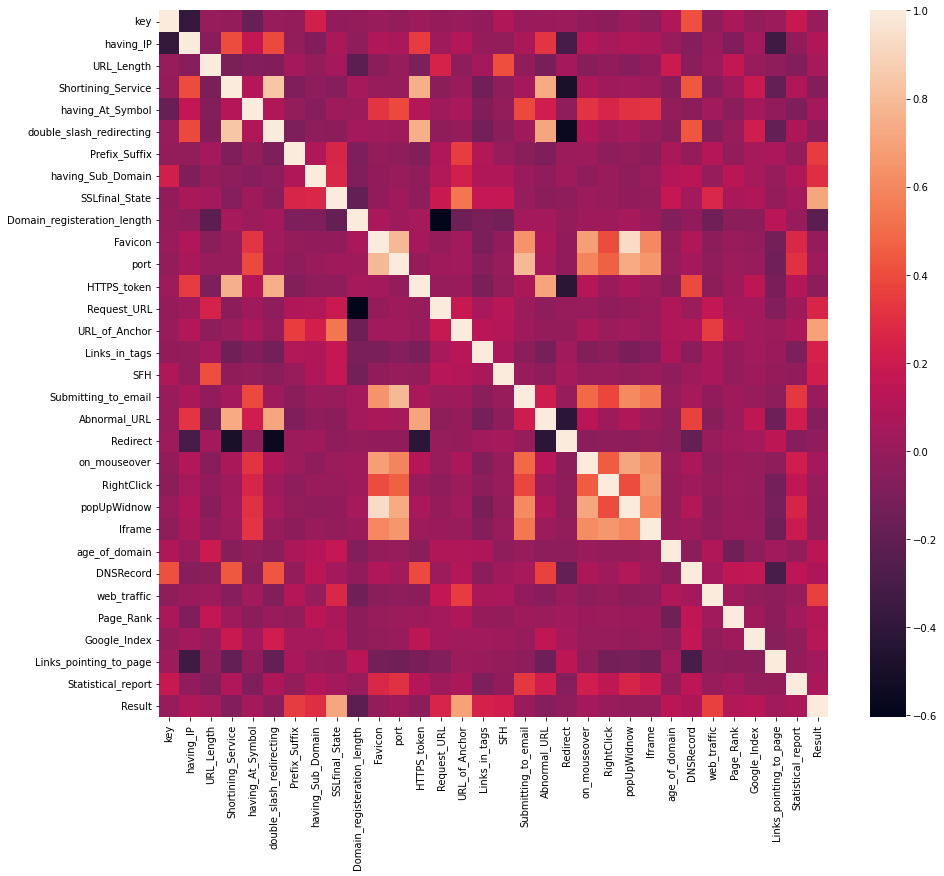

In [17]:
#Correlation heatmap

plt.figure(figsize=(15,13))
sns.heatmap(df.corr())
plt.show()

In [18]:
#checking the data for null or missing values
df.isnull().sum()

key                            0
having_IP                      0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistica

In [19]:
df.head(30)

,key,having_IP,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,12344,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,12345,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,12346,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,12347,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,12348,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
5,12349,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1
6,12350,1,0,-1,1,1,-1,-1,-1,1,...,1,1,1,-1,-1,-1,1,0,-1,-1
7,12351,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,0,-1,1,0,1,-1
8,12352,1,0,-1,1,1,-1,1,1,-1,...,1,1,1,-1,1,1,1,0,1,1
9,12353,1,1,-1,1,1,-1,-1,1,-1,...,1,1,1,-1,0,-1,1,0,1,-1


**Dataset Splitting / Categorizing**

In [75]:
y = df['Result']
X = df.drop('Result',axis=1)
X.shape, y.shape

((8955, 31), (8955,))

In [76]:
# Splitting the dataset into train and test sets: 80-20 split as all of this is training data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((7164, 31), (1791, 31))

# Training the model

We will use XGBoost ( eXtreme Gradient Boosting.) algorithm for the classification task.

In [77]:
#importing packages
from sklearn.metrics import accuracy_score

In [78]:
#XGBoost Classification model
from xgboost import XGBClassifier

In [79]:
# instantiate the model
xgb = XGBClassifier(learning_rate=0.4,max_depth=7)
#fit the model
xgb.fit(X_train, y_train)

XGBClassifier(learning_rate=0.4, max_depth=7)

In [80]:
#predicting the target value from the model for the samples
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

In [81]:
#computing the accuracy of the model performance
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)

print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_xgb))

XGBoost: Accuracy on training Data: 1.000
XGBoost : Accuracy on test Data: 0.963


# Using Neural networks

In [120]:
#importing required packages
import keras
from keras.layers import Input, Dense
from keras import regularizers
import tensorflow as tf
from keras.models import Model
from sklearn import metrics

In [121]:
from sklearn.model_selection import train_test_split

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape

((7164, 31), (1791, 31))

In [123]:
import tensorflow as tf
tf.random.set_seed(42)


model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(lr=0.03),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


224/224 [==============================] - 2s 3ms/step - loss: 139.9522 - accuracy: 0.0105 - precision: 1.0000 - recall: 0.0223
Epoch 2/100
224/224 [==============================] - 1s 4ms/step - loss: 0.3812 - accuracy: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 3/100
224/224 [==============================] - 1s 3ms/step - loss: 0.3792 - accuracy: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 4/100
224/224 [==============================] - 1s 3ms/step - loss: 0.3819 - accuracy: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 5/100
224/224 [==============================] - 1s 3ms/step - loss: 0.3806 - accuracy: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 6/100
224/224 [==============================] - 1s 3ms/step - loss: 0.3830 - accuracy: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 7/100
224/224 [==============================] - 1s 3ms/step - loss: 0.3798 - accuracy: 0.0000e+00 - precision: 0.00

# Random Forest

In [105]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(max_depth=5)

# fit the model 
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [106]:
#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

In [107]:
#computing the accuracy of the model performance
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 0.934
Random forest: Accuracy on test Data: 0.936


# Multilayer Perceptron

In [108]:
# Multilayer Perceptrons model
from sklearn.neural_network import MLPClassifier

# instantiate the model
mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=([100,100,100]))

# fit the model 
mlp.fit(X_train, y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=[100, 100, 100])

In [109]:
#predicting the target value from the model for the samples
y_test_mlp = mlp.predict(X_test)
y_train_mlp = mlp.predict(X_train)

In [110]:
#computing the accuracy of the model performance
acc_train_mlp = accuracy_score(y_train,y_train_mlp)
acc_test_mlp = accuracy_score(y_test,y_test_mlp)

print("Multilayer Perceptrons: Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multilayer Perceptrons: Accuracy on test Data: {:.3f}".format(acc_test_mlp))

Multilayer Perceptrons: Accuracy on training Data: 0.828
Multilayer Perceptrons: Accuracy on test Data: 0.833


# LightGBM Classifier

In [111]:
# build the lightgbm model
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)

LGBMClassifier()

In [112]:
# predict the results
y_pred=clf.predict(X_test)

In [113]:
# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy score: 0.9687


In [114]:
y_pred_train = clf.predict(X_train)

In [115]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9884


In [116]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))

Training set score: 0.9884
Test set score: 0.9687


# Submission File

In [44]:
my_submission = pd.DataFrame({'key':data.key , 'Result':Result})
my_submission.to_csv('submission_2.csv', index=False)

**Working on Test Data Case -2**

In [86]:
data2 = pd.read_csv('/content/Phising_Testing_Dataset.csv')

In [87]:
data2.head()

,key,having_IP,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,21338,1,1,1,1,1,1,-1,1,-1,...,1,1,1,1,1,1,1,-1,0,1
1,21339,1,-1,1,1,1,-1,0,-1,1,...,1,1,1,-1,-1,0,-1,-1,0,1
2,21340,1,-1,1,1,1,-1,0,0,-1,...,-1,-1,-1,1,-1,1,-1,1,1,-1
3,21341,-1,-1,-1,1,-1,-1,-1,-1,1,...,1,-1,-1,1,-1,1,-1,1,1,-1
4,21342,1,-1,1,1,1,-1,1,1,-1,...,1,1,1,1,1,1,-1,1,0,1


In [118]:
Result = clf.predict(data2)
Result

[ 1 -1 -1 ... -1  1  1]


array([ 1, -1, -1, ..., -1,  1,  1])

In [119]:
my_subm = pd.DataFrame({'key':data2.key , 'Result':Result})
my_subm.to_csv('submission_3.csv', index=False)